In [1]:
import tensorflow as tf

In [2]:
print(tf.test.is_built_with_cuda()) 

True


In [3]:
tf.test.is_gpu_available()

True

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# The above code ensures that your environment is configured to GPU.

In [6]:
# We will write a code to classify images using ANN. Generally, we use CNN (Convolution Neural Network) to classify images,
# but for now we will be using ANN

In [7]:
from tensorflow import keras

In [8]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
# 50000 ==> Number of images/samples
# 32,32 ==> image matrix of the image
# 3     ==> RGB

In [11]:
y_train.shape

(50000, 1)

In [12]:
# 50000 ==> Number of labels for those 50000 images
# 1     ==> It is the output that is numbered 0 to 9
# The output number denotes:
# 0.airplane
# 1.automobile
# 2.bird
# 3.cat
# 4.deer
# 5.dog
# 6.frog
# 7.horse
# 8.ship
# 9.truck
# For more reference, visit keras datasets

In [13]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
import matplotlib.pyplot as plt

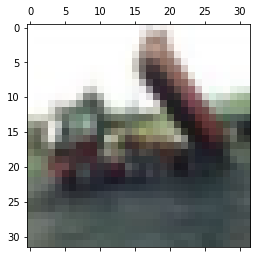

In [15]:
plt.matshow((x_train[2]))

In [16]:
# Now we need to make an array such that if you pass the output values (i.e., output values) you get its label.

In [17]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [18]:
y_train[0]
# Since, the datatype of this is an array, we need to take its first element.

array([6], dtype=uint8)

In [19]:
classes[(y_train[2])[0]]

'truck'

In [20]:
# Now we need to scale the image matrix because its value will range between 0 to 255

In [21]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [22]:
x_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [23]:
# Our output variables are discrete but we need it to be one hot encoded, so we use tensorflow.keras to convert it into categorical features.

In [24]:
dir(keras.utils)

['CustomObjectScope',
 'GeneratorEnqueuer',
 'HDF5Matrix',
 'OrderedEnqueuer',
 'Progbar',
 'Sequence',
 'SequenceEnqueuer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'convert_all_kernels_in_model',
 'custom_object_scope',
 'deserialize_keras_object',
 'get_custom_objects',
 'get_file',
 'get_source_inputs',
 'model_to_dot',
 'multi_gpu_model',
 'normalize',
 'plot_model',
 'serialize_keras_object',
 'to_categorical']

In [25]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10)
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
# You can see that our y_train variables are now one-hot encoded.

In [27]:
y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10)

***In loss function, we use categorical cross entropy when you have one hot encoded variables and use sparse-categorical cross entropy when you have discrete output variables.***

In [28]:
model=keras.Sequential([
    # Since we are using images, we are going to flatten the matrix (because it is a 2D matrix).
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'), # input to hidden 1
    keras.layers.Dense(1000,activation='relu'), # hidden 1 to hidden 2
    keras.layers.Dense(10,activation='sigmoid'), # hidden 2 to output
])

In [29]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy']) 
# We are using SGD because our training sample is large

In [30]:
model.fit(x_train_scaled,y_train_categorical,epochs=35)

Train on 50000 samples
Epoch 1/35
50000/50000 [==============================] - 11s 219us/sample - loss: 1.8607 - accuracy: 0.3346
Epoch 2/35
50000/50000 [==============================] - 10s 190us/sample - loss: 1.6563 - accuracy: 0.4138
Epoch 3/35
50000/50000 [==============================] - 10s 195us/sample - loss: 1.5705 - accuracy: 0.4453
Epoch 4/35
50000/50000 [==============================] - 10s 194us/sample - loss: 1.5075 - accuracy: 0.4687
Epoch 5/35
50000/50000 [==============================] - 10s 197us/sample - loss: 1.4576 - accuracy: 0.4880
Epoch 6/35
50000/50000 [==============================] - 10s 195us/sample - loss: 1.4142 - accuracy: 0.5025
Epoch 7/35
50000/50000 [==============================] - 10s 199us/sample - loss: 1.3736 - accuracy: 0.5166
Epoch 8/35
50000/50000 [==============================] - 10s 205us/sample - loss: 1.3381 - accuracy: 0.5273
Epoch 9/35
50000/50000 [==============================] - 11s 217us/sample - loss: 1.3071 - accuracy: 0.5

In [31]:
import numpy as np

In [33]:
y_pred=model.predict(x_test_scaled)

In [52]:
classes[np.argmax(y_pred[1])]

'ship'

In [49]:
classes[(y_test[1])[0]]

'ship'

In [55]:
model.evaluate(x_test_scaled,y_test_categorical)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.462647227859497, 0.5261]